#**LEMBAR JAWAB UJIAN AKHIR SEMESTER GENAP 2021/2022**

##BIG DATA AND PREDICTIVE ANALITYCS

KELOMPOK 4

1. Fathurrahman Nur Aziz (20.11.3694)
2. Mahfuuzh Naufal Muammar (20.11.3706)
3. Ahmad Zubaed Itqan (20.11.3689)
4. Pradipta Alif Parantopo (20.11.3703)


##**IMPORT LIBRARY**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##**IMPORT TABLE / CSV**

*   URL dibawah adalah hasil download dari UCI dengan judul "PM2.5 Data of Five Chinese Cities Data Set" (https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities#)
*   Dataset kemudian di download dan di upload ke repository github karena data mentah dari UCI masih berbentuk RAR
*   Link Github : https://github.com/azizfath/fp-bdpa





In [54]:
url = "https://raw.githubusercontent.com/azizfath/fp-bdpa/main/ShanghaiPM20100101_20151231.csv"
df = pd.read_csv(url)

###**DATA PREPARATION**

**1) Melihat Jumlah Row dan Column dari DATA**

In [55]:
df.shape

(52584, 17)

**2) Melihat tipe data tiap kolom**

In [56]:
df.dtypes

No                 int64
year               int64
month              int64
day                int64
hour               int64
season             int64
PM_Jingan        float64
PM_US Post       float64
PM_Xuhui         float64
DEWP             float64
HUMI             float64
PRES             float64
TEMP             float64
cbwd              object
Iws              float64
precipitation    float64
Iprec            float64
dtype: object

**3) Cek apakah terdapat data kosong atau NA**

In [57]:
df.isna()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
52580,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
52581,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
52582,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
df.isna().sum()

No                   0
year                 0
month                0
day                  0
hour                 0
season               0
PM_Jingan        27884
PM_US Post       18545
PM_Xuhui         27395
DEWP                13
HUMI                13
PRES                28
TEMP                13
cbwd                12
Iws                 12
precipitation     4009
Iprec             4009
dtype: int64

**4) Melakukan penghapusan data yang kosong atau NaN, kemudian melakukan reset index dan penghapusan kolom "No" bawaan dari Dataset**

In [59]:
df = df.dropna().reset_index().drop(columns=['No'])

**5) Pengecekan kembali apakah masih ada data kosong atau NA**

In [60]:
df.isna().sum()

index            0
year             0
month            0
day              0
hour             0
season           0
PM_Jingan        0
PM_US Post       0
PM_Xuhui         0
DEWP             0
HUMI             0
PRES             0
TEMP             0
cbwd             0
Iws              0
precipitation    0
Iprec            0
dtype: int64

**6) Melihat Jumlah Row dan Column setelah penghapusan data kosong**

In [61]:
df.shape

(21436, 17)

**7) Melakukan Combine kolom Year, Month, Date, Hour menjadi satu kolom kemudian menghapus kolom bawaan dari dataset**

In [62]:
date = pd.to_datetime(df[['year','month','day','hour']])
df.insert(1,'datetime',date)
df.drop(['year','month','day','hour'],axis=1,inplace=True)

###**EDA (Exploratory Data Analytics)**

**1) Print Preview dari Data**

In [63]:
df

,index,datetime,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,26304,2013-01-01 00:00:00,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0
1,26305,2013-01-01 01:00:00,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0
2,26307,2013-01-01 03:00:00,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0
3,26308,2013-01-01 04:00:00,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0
4,26309,2013-01-01 05:00:00,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,SW,70.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,52578,2015-12-31 18:00:00,4,93.0,92.0,90.0,-2.0,60.51,1035.0,5.0,NE,12.0,0.0,0.0
21432,52579,2015-12-31 19:00:00,4,86.0,82.0,90.0,-1.0,65.13,1035.0,5.0,NE,15.0,0.0,0.0
21433,52580,2015-12-31 20:00:00,4,83.0,93.0,86.0,1.0,70.27,1035.0,6.0,NE,19.0,0.0,0.0
21434,52581,2015-12-31 21:00:00,4,85.0,90.0,95.0,1.0,70.27,1036.0,6.0,NE,22.0,0.0,0.0


**2) Melihat 10 Data teratas**

In [64]:
df.head(10)

,index,datetime,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,26304,2013-01-01 00:00:00,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0
1,26305,2013-01-01 01:00:00,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0
2,26307,2013-01-01 03:00:00,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0
3,26308,2013-01-01 04:00:00,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0
4,26309,2013-01-01 05:00:00,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,SW,70.0,0.0,0.0
5,26310,2013-01-01 06:00:00,4,74.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,71.0,0.0,0.0
6,26311,2013-01-01 07:00:00,4,73.0,80.0,84.0,-4.0,86.15,1024.0,-2.0,cv,0.0,0.0,0.0
7,26312,2013-01-01 08:00:00,4,77.0,76.0,87.0,-5.0,79.89,1024.0,-2.0,cv,1.0,0.0,0.0
8,26313,2013-01-01 09:00:00,4,73.0,74.0,91.0,-3.0,60.25,1025.0,4.0,SW,4.0,0.0,0.0
9,26314,2013-01-01 10:00:00,4,82.0,76.0,88.0,-4.0,48.63,1025.0,6.0,SW,8.0,0.0,0.0


**3) Melihat 10 data terakhir**

In [65]:
df.tail(10)

,index,datetime,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
21426,52573,2015-12-31 13:00:00,4,85.0,85.0,102.0,-3.0,39.93,1034.0,10.0,NW,4.0,0.0,0.0
21427,52574,2015-12-31 14:00:00,4,75.0,84.0,71.0,-4.0,37.05,1034.0,10.0,NE,4.0,0.0,0.0
21428,52575,2015-12-31 15:00:00,4,82.0,82.0,78.0,-2.0,43.01,1034.0,10.0,NW,5.0,0.0,0.0
21429,52576,2015-12-31 16:00:00,4,82.0,88.0,88.0,-2.0,46.00,1034.0,9.0,NE,5.0,0.0,0.0
21430,52577,2015-12-31 17:00:00,4,88.0,91.0,86.0,-2.0,52.70,1034.0,7.0,NE,9.0,0.0,0.0
21431,52578,2015-12-31 18:00:00,4,93.0,92.0,90.0,-2.0,60.51,1035.0,5.0,NE,12.0,0.0,0.0
21432,52579,2015-12-31 19:00:00,4,86.0,82.0,90.0,-1.0,65.13,1035.0,5.0,NE,15.0,0.0,0.0
21433,52580,2015-12-31 20:00:00,4,83.0,93.0,86.0,1.0,70.27,1035.0,6.0,NE,19.0,0.0,0.0
21434,52581,2015-12-31 21:00:00,4,85.0,90.0,95.0,1.0,70.27,1036.0,6.0,NE,22.0,0.0,0.0
21435,52582,2015-12-31 22:00:00,4,83.0,86.0,92.0,0.0,70.06,1035.0,5.0,NE,25.0,0.0,0.0


**4) Melihat Nama Kolom dari dataset**

In [66]:
df.columns

Index(['index', 'datetime', 'season', 'PM_Jingan', 'PM_US Post', 'PM_Xuhui',
       'DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation',
       'Iprec'],
      dtype='object')



> Informasi Kolom dari web UCI
> * No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (ug/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)



**5) Melihat Informasi kolom tiap tabel terkait Jumlah Row dan Datatypes**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          21436 non-null  int64         
 1   datetime       21436 non-null  datetime64[ns]
 2   season         21436 non-null  int64         
 3   PM_Jingan      21436 non-null  float64       
 4   PM_US Post     21436 non-null  float64       
 5   PM_Xuhui       21436 non-null  float64       
 6   DEWP           21436 non-null  float64       
 7   HUMI           21436 non-null  float64       
 8   PRES           21436 non-null  float64       
 9   TEMP           21436 non-null  float64       
 10  cbwd           21436 non-null  object        
 11  Iws            21436 non-null  float64       
 12  precipitation  21436 non-null  float64       
 13  Iprec          21436 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 2

**6) Melihat deskripsi Statistik dari Dataset**

In [68]:
df.describe()

,index,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000
mean,39188.541239,2.469117,57.964546,54.134633,58.571702,11.194019,68.672159,1016.059899,17.618026,48.276497,0.133099,0.871483
std,7373.461529,1.135687,48.138166,43.277176,49.225516,9.503136,18.100383,8.956274,8.982793,67.698391,1.030226,6.794960
min,26304.000000,1.000000,1.000000,1.000000,1.000000,-17.000000,13.090000,990.000000,-3.000000,0.000000,0.000000,0.000000
25%,32868.750000,1.000000,26.000000,27.000000,26.000000,3.000000,56.380000,1008.000000,10.000000,6.000000,0.000000,0.000000
50%,38864.500000,2.000000,44.000000,42.000000,44.000000,12.000000,70.670000,1016.000000,18.000000,20.000000,0.000000,0.000000
75%,45453.250000,3.000000,73.000000,67.000000,74.000000,20.000000,83.010000,1023.000000,25.000000,62.000000,0.000000,0.000000
max,52582.000000,4.000000,607.000000,514.000000,636.000000,28.000000,100.000000,1040.000000,41.000000,608.000000,61.600000,226.400000


###**VISUALISASI DATA**

**1) Memvisualisasikan Data Kelembaban dan Suhu dalam bentuk Line Chart**

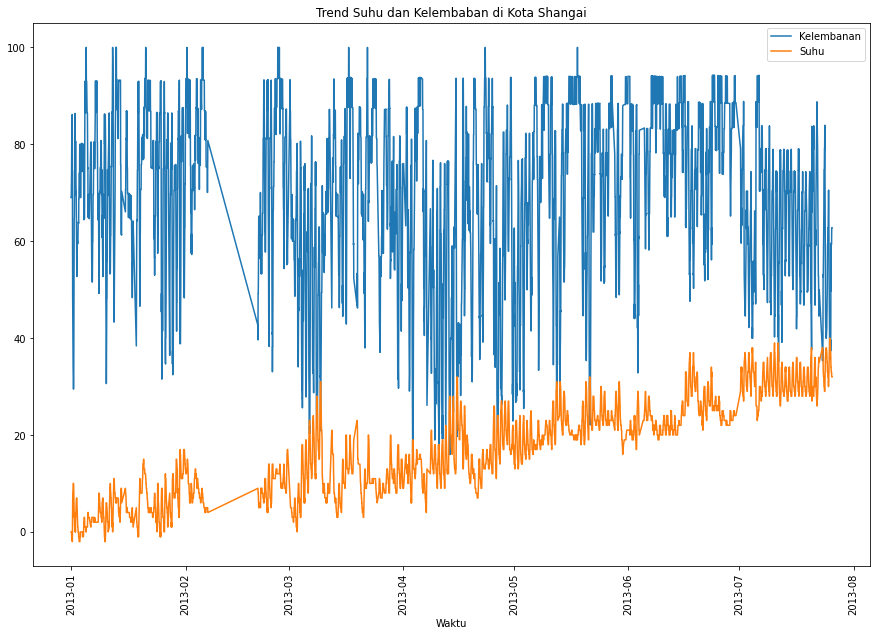

In [69]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df['datetime'][0:4000], df['HUMI'][0:4000])
ax.plot(df['datetime'][0:4000], df['TEMP'][0:4000])
plt.xticks(rotation=90)
plt.xlabel('Waktu')
plt.legend(['Kelembanan', 'Suhu'])
plt.title('Trend Suhu dan Kelembaban di Kota Shangai')
plt.show()

**2) Memvisualisasikan Data Tekanan Udara dalam bentuk Line Chart**

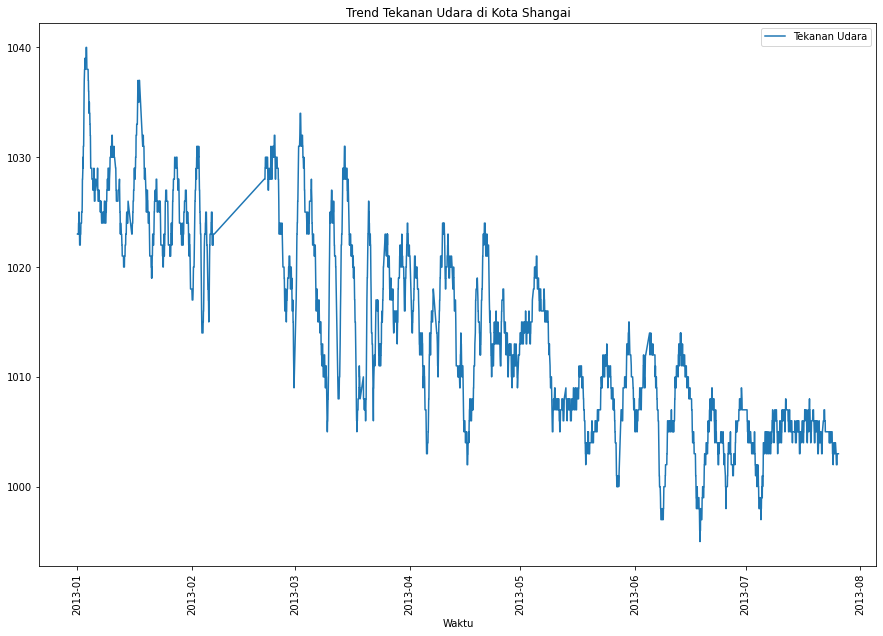

In [70]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df['datetime'][0:4000], df['PRES'][0:4000])
plt.xticks(rotation=90)
plt.xlabel('Waktu')
plt.legend(['Tekanan Udara'])
plt.title('Trend Tekanan Udara di Kota Shangai')
plt.show()

**3) Memvisualisasikan Musim dan Curah Hujan dalam bentuk Line Chart**

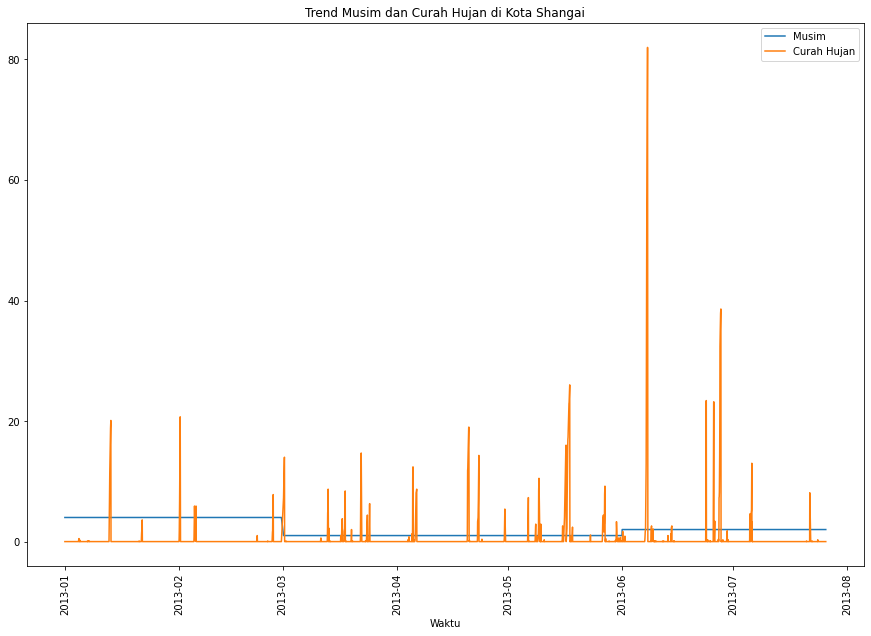

In [71]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df['datetime'][0:4000], df['season'][0:4000])
ax.plot(df['datetime'][0:4000], df['Iprec'][0:4000])
plt.xticks(rotation=90)
plt.xlabel('Waktu')
plt.legend(['Musim','Curah Hujan'])
plt.title('Trend Musim dan Curah Hujan di Kota Shangai')
plt.show()

**4) Memvisualisasikan PM2.5 dan Tekanan Udara dalam bentuk Line Chart**

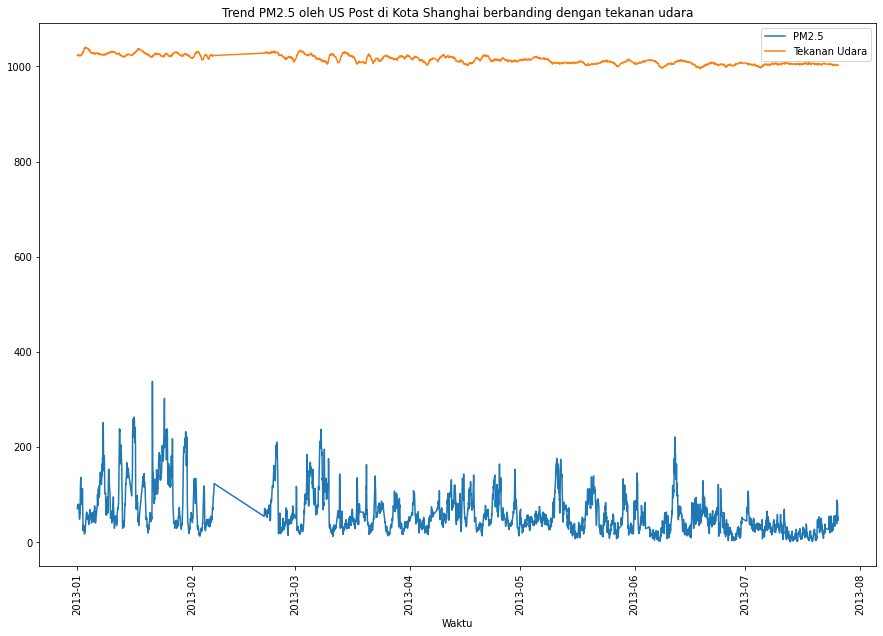

In [72]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df['datetime'][0:4000], df['PM_US Post'][0:4000])
ax.plot(df['datetime'][0:4000], df['PRES'][0:4000])
plt.xticks(rotation=90)
plt.xlabel('Waktu')
plt.legend(['PM2.5','Tekanan Udara'])
plt.title('Trend PM2.5 oleh US Post di Kota Shanghai berbanding dengan tekanan udara')
plt.show()

**5) Memvisualisasikan Histogram dari Kolom Humidity, Temperature, Pressure, dan PM2.5**

Text(0.5, 1.0, 'Histogram of PM2.5 US Post in Shanghai')

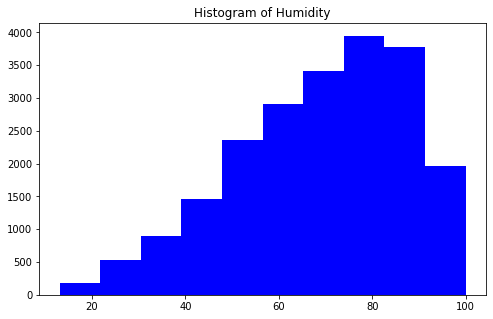

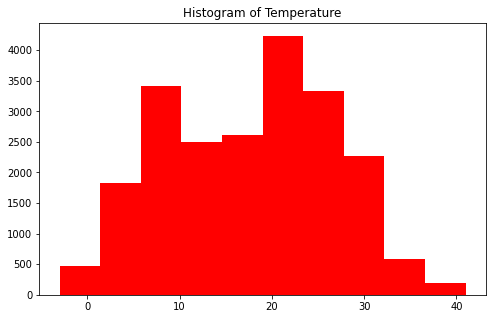

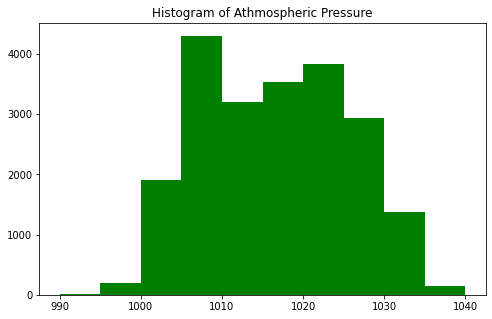

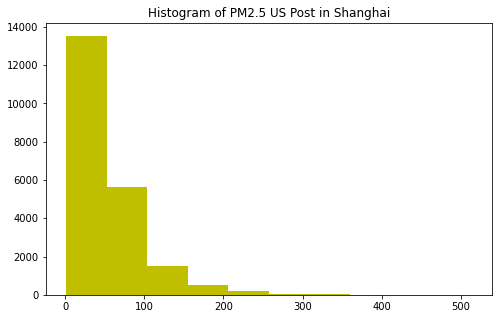

In [73]:
df.hist(column='HUMI',grid=False, figsize=(8,5),zorder=2,color="b")
plt.title("Histogram of Humidity")
df.hist(column='TEMP',grid=False, figsize=(8,5),zorder=2,color="r")
plt.title("Histogram of Temperature")
df.hist(column='PRES',grid=False, figsize=(8,5),zorder=2,color="g")
plt.title("Histogram of Athmospheric Pressure")
df.hist(column='PM_US Post',grid=False, figsize=(8,5),zorder=2,color="y")
plt.title("Histogram of PM2.5 US Post in Shanghai")

**6) Memvisualisasikan variabel PM2.5 dan PRESSURE dengan scatter**

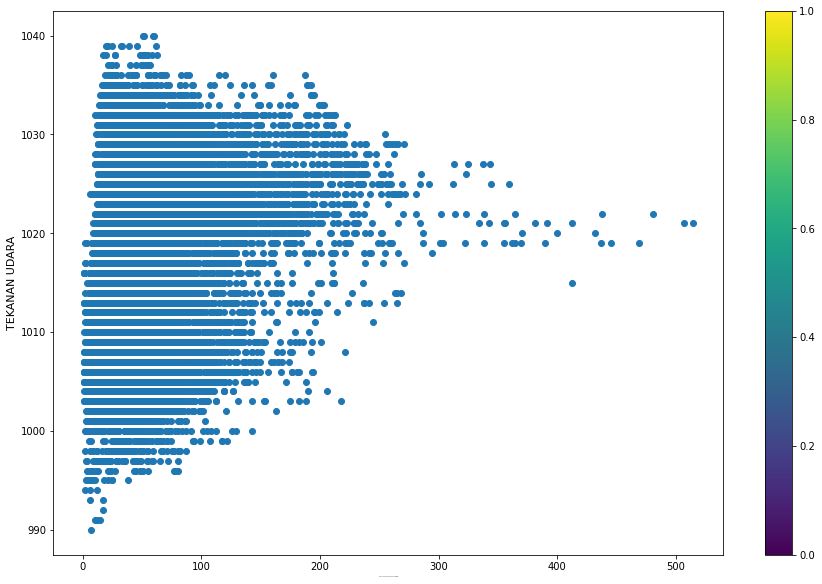

In [74]:
fig, ax = plt.subplots(figsize=(15,10))
x = ax.scatter(df['PM_US Post'], df['PRES'], cmap='autumn')

ax.set_xlabel('PM2.5 oleh US Post di kota Shanghai', size=11)
ax.set_ylabel('TEKANAN UDARA', size=11)

fig.colorbar(x)

plt.show()

###KORELASI VARIABEL

**1) Mencari korelasi seluruh variabel**

In [75]:
df.corr()

,index,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
index,1.000000,0.079343,-0.099722,-0.108655,-0.123540,0.101403,0.096231,0.004241,0.059361,-0.028797,0.012849,-0.006839
season,0.079343,1.000000,0.177605,0.230919,0.204987,-0.390207,-0.021194,0.534970,-0.431650,0.021201,-0.029516,-0.008816
PM_Jingan,-0.099722,0.177605,1.000000,0.961782,0.966048,-0.220579,-0.071567,0.146597,-0.207479,-0.209668,-0.063040,-0.092288
PM_US Post,-0.108655,0.230919,0.961782,1.000000,0.951737,-0.337400,-0.086893,0.260391,-0.330369,-0.189228,-0.072191,-0.094616
PM_Xuhui,-0.123540,0.204987,0.966048,0.951737,1.000000,-0.266787,-0.087063,0.188107,-0.251203,-0.202839,-0.062692,-0.092003
DEWP,0.101403,-0.390207,-0.220579,-0.337400,-0.266787,1.000000,0.434235,-0.847117,0.871722,-0.031287,0.088187,0.080464
HUMI,0.096231,-0.021194,-0.071567,-0.086893,-0.087063,0.434235,1.000000,-0.218019,-0.053106,0.028518,0.142509,0.162207
PRES,0.004241,0.534970,0.146597,0.260391,0.188107,-0.847117,-0.218019,1.000000,-0.832720,0.035243,-0.089766,-0.078549
TEMP,0.059361,-0.431650,-0.207479,-0.330369,-0.251203,0.871722,-0.053106,-0.832720,1.000000,-0.054971,0.030618,0.013869
Iws,-0.028797,0.021201,-0.209668,-0.189228,-0.202839,-0.031287,0.028518,0.035243,-0.054971,1.000000,0.046008,0.067309


**2) Memvisualisasikan Korelasi antar variabel dengan heatmap**

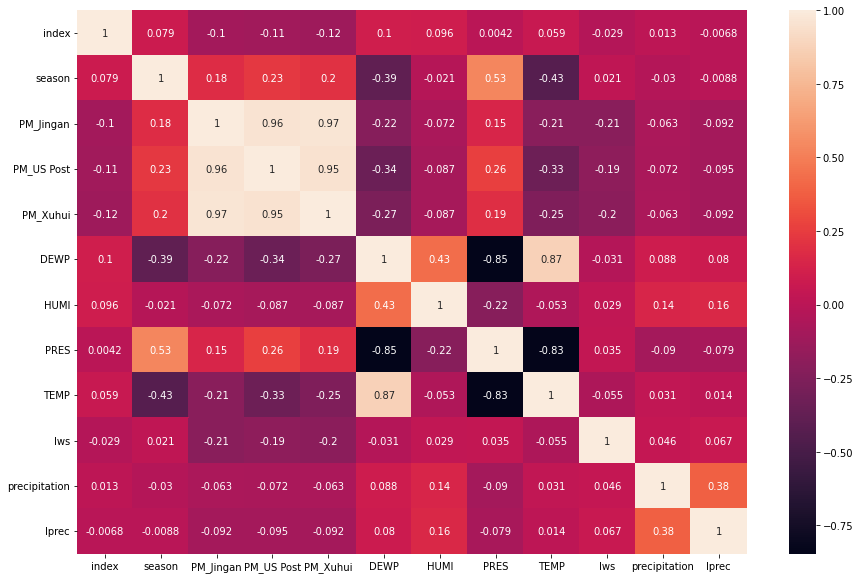

In [76]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(),vmax=1,annot=True)

**3) Membuat fungsi untuk menginterpretasikan korelasi dan signifikansi p_value**



In [77]:
def koef(m,n):
  pearson_coef, p_value = stats.pearsonr(df[m],df[n])

  if pearson_coef > 0:
    msg1 = f"variabel {m} dan {n} berkorelasi positif"
  elif pearson_coef == 0:
    msg1 = f"variabel {m} dan {n} tidak memiliki korelasi"
  elif pearson_coef < 0:
    msg1 = f"variabel {m} dan {n} berkorelasi negatif"

  if p_value < 0.0001:
    msg2 = f"terbukti kuat bahwa variabel {m} dan {n} signifikan"
  elif p_value < 0.05:
    msg2 = f"terbukti moderat bahwa variabel {m} dan {n} signifikan"
  elif p_value < 0.1:
    msg2 = f"terbukti lemah bahwa variabel {m} dan {n} signifikan"
  elif p_value > 0.1:
    msg2 = f"tidak ada bukti bahwa variabel {m} dan {n} signifikan"
  
  print(f"Nilai korelasi pearson dari {m} dan {n} adalah {pearson_coef}")
  print(f"Nilai p_value dari {m} dan {n} adalah {p_value}")
  print("\n")
  print(f"Dari nilai korelasi pearson, maka {msg1}")
  print(f"Dari nilai p_value, maka {msg2}")

**4) Menghitung korelasi dan interpretasinya untuk variabel HUMIDITY dan PRESSURE**

In [78]:
koef('HUMI','PRES')

Nilai korelasi pearson dari HUMI dan PRES adalah -0.21801874455927311
Nilai p_value dari HUMI dan PRES adalah 5.448886790686899e-229


Dari nilai korelasi pearson, maka variabel HUMI dan PRES berkorelasi negatif
Dari nilai p_value, maka terbukti kuat bahwa variabel HUMI dan PRES signifikan


**5) Menghitung korelasi dan interpretasinya untuk variabel HUMIDITY dan IPREC**

In [79]:
koef('HUMI', 'Iprec')

Nilai korelasi pearson dari HUMI dan Iprec adalah 0.1622065938862503
Nilai p_value dari HUMI dan Iprec adalah 2.664614247488665e-126


Dari nilai korelasi pearson, maka variabel HUMI dan Iprec berkorelasi positif
Dari nilai p_value, maka terbukti kuat bahwa variabel HUMI dan Iprec signifikan


**6) Menghitung korelasi dan interpretasinya untuk variabel PM2.5 dan PRESSURE**

In [80]:
koef('PM_US Post', 'PRES')

Nilai korelasi pearson dari PM_US Post dan PRES adalah 0.260390706862233
Nilai p_value dari PM_US Post dan PRES adalah 0.0


Dari nilai korelasi pearson, maka variabel PM_US Post dan PRES berkorelasi positif
Dari nilai p_value, maka terbukti kuat bahwa variabel PM_US Post dan PRES signifikan


###**REGRESI**

**1) Preparasi data, membagi data menjadi data train dan data test**

In [81]:
np.random.seed(100)
split = np.random.rand(len(df))<0.8
data_train = df[split]
data_test = df[~split]

**2) Mendefinikan x_train, x_test, y_train, dan y_test**

>karena yang akan kita cari adalah regresi linear antara PM2.5 dan PRESSURE maka variabel x adalah PM2.5 dan variabel y adalah PRESSURE

In [82]:
x_train = np.asanyarray(data_train[['PM_US Post']])
y_train = np.asanyarray(data_train[['PRES']])

x_test = np.asanyarray(data_test[['PM_US Post']])
y_test = np.asanyarray(data_test[['PRES']])

**3) Membuat model linear regresi**

In [83]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

**4) Menampilkan koefisien dan atribut linear regresi**

In [84]:
print ('Coefficients: ', lr_model.coef_)
print ('Intercept: ', lr_model.intercept_)

Coefficients:  [[0.05488261]]
Intercept:  [1013.09232984]


**5) Memvisualisasikan Linear Regressi**

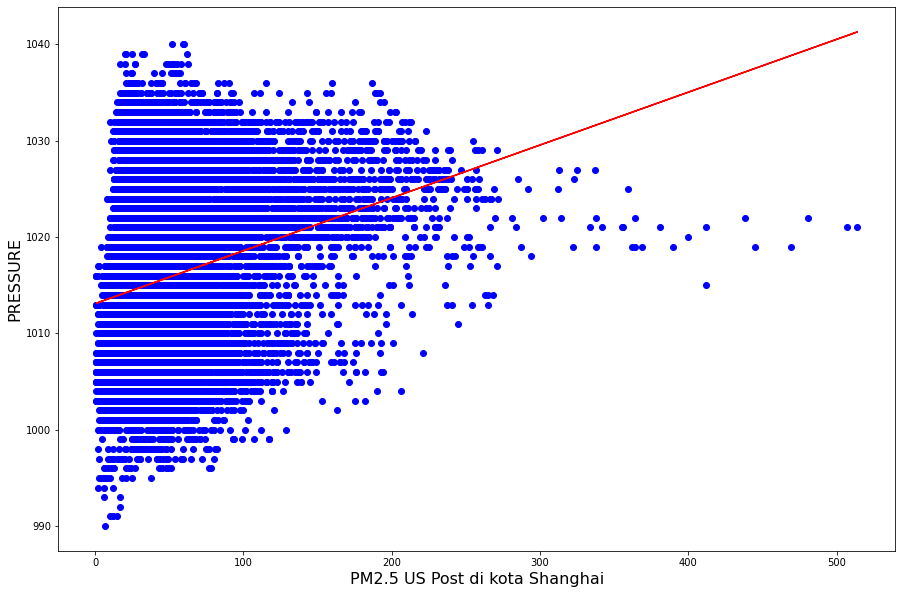

In [92]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x_train, y_train,  color='blue')
ax.plot(x_train, lr_model.coef_[0][0]*x_train + lr_model.intercept_[0], '-r')
ax.set_xlabel('PM2.5 US Post di kota Shanghai', size=16)
ax.set_ylabel('PRESSURE', size=16)

plt.show()

**6) Melakukan prediksi dari model**

In [97]:
y_pred = lr_model.predict(x_test)

print('Data asli: \n', y_test[0:10])
print('\n')
print('Hasil prediksi: \n', y_pred[0:10])

Data asli: 
 [[1023.]
 [1024.]
 [1024.]
 [1022.]
 [1022.]
 [1023.]
 [1024.]
 [1024.]
 [1031.]
 [1031.]]


Hasil prediksi: 
 [[1017.31829086]
 [1017.26340825]
 [1016.71458214]
 [1016.44016909]
 [1016.38528648]
 [1019.5684779 ]
 [1019.34894746]
 [1018.08664741]
 [1015.06810382]
 [1014.68392555]]


**7) Mengevaluasi kinerja model**

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menampilkan MAE dan MSE
print('Mean Absolute Error (MAE): %.2f' % mean_absolute_error(y_pred, y_test))
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(y_pred, y_test))

Mean Absolute Error (MAE): 7.31
Mean Squared Error (MSE): 75.55
